Make sure to set the runtime to GPU: Runtime -> Change runtime type -> T4 GPU

You can upload your own images, then change the relevant code cells to load it and send it through the model.

In [ ]:
# install the intrinsic decomposition repo from github
!pip install https://github.com/compphoto/Intrinsic/archive/main.zip

In [1]:
import torch

# import some helper functions from chrislib (will be installed by the intrinsic repo)
from chrislib.general import show, view, invert
from chrislib.data_util import load_from_url

# import model loading and running the pipeline
from intrinsic.pipeline import load_models, run_pipeline

/transfer/s5708799/ASE/programming-project-ofayed/Intrinsic Image Decomposition/Intrinsic/intrinsic_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# download the pretrained weights and return the model (may take a bit to download weights the first time)
intrinsic_model = load_models('v2')

Downloading: "https://github.com/compphoto/Intrinsic/releases/download/v2.0/stage_0.pt" to /home/s5708799/.cache/torch/hub/checkpoints/stage_0.pt
100%|██████████| 403M/403M [00:11<00:00, 35.7MB/s] 
Downloading: "https://github.com/compphoto/Intrinsic/releases/download/v2.0/stage_1.pt" to /home/s5708799/.cache/torch/hub/checkpoints/stage_1.pt
100%|██████████| 81.8M/81.8M [00:02<00:00, 42.7MB/s]
Downloading: "https://github.com/compphoto/Intrinsic/releases/download/v2.0/stage_2.pt" to /home/s5708799/.cache/torch/hub/checkpoints/stage_2.pt
100%|██████████| 403M/403M [00:11<00:00, 36.4MB/s] 
Downloading: "https://github.com/compphoto/Intrinsic/releases/download/v2.0/stage_3.pt" to /home/s5708799/.cache/torch/hub/checkpoints/stage_3.pt
100%|██████████| 403M/403M [00:12<00:00, 33.0MB/s] 
Downloading: "https://github.com/compphoto/Intrinsic/releases/download/v2.0/stage_4.pt" to /home/s5708799/.cache/torch/hub/checkpoints/stage_4.pt
100%|██████████| 403M/403M [00:12<00:00, 33.9MB/s] 
Downloadi

In [15]:
# load the image to run through the pipeline
import cv2

# Load a local image as a NumPy array


img = load_from_url('https://raw.githubusercontent.com/compphoto/Intrinsic/refs/heads/main/figures/canal.png')
test_image = ("Test_Images/Test1.png")
image = cv2.imread(test_image, cv2.IMREAD_UNCHANGED) 
print(type(img))
print(type(image))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
# run the image through the pipeline (runs all stages)
result = run_pipeline(
    intrinsic_model,
    image,
    device='cuda'
)

RuntimeError: Input type (torch.cuda.DoubleTensor) and weight type (torch.cuda.FloatTensor) should be the same

In [12]:
img = result['image']
alb = view(result['hr_alb']) # gamma correct the estimated albedo
dif = 1 - invert(result['dif_shd']) # tonemap the diffuse shading
res = result['residual']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.41824448108673096..1.0].


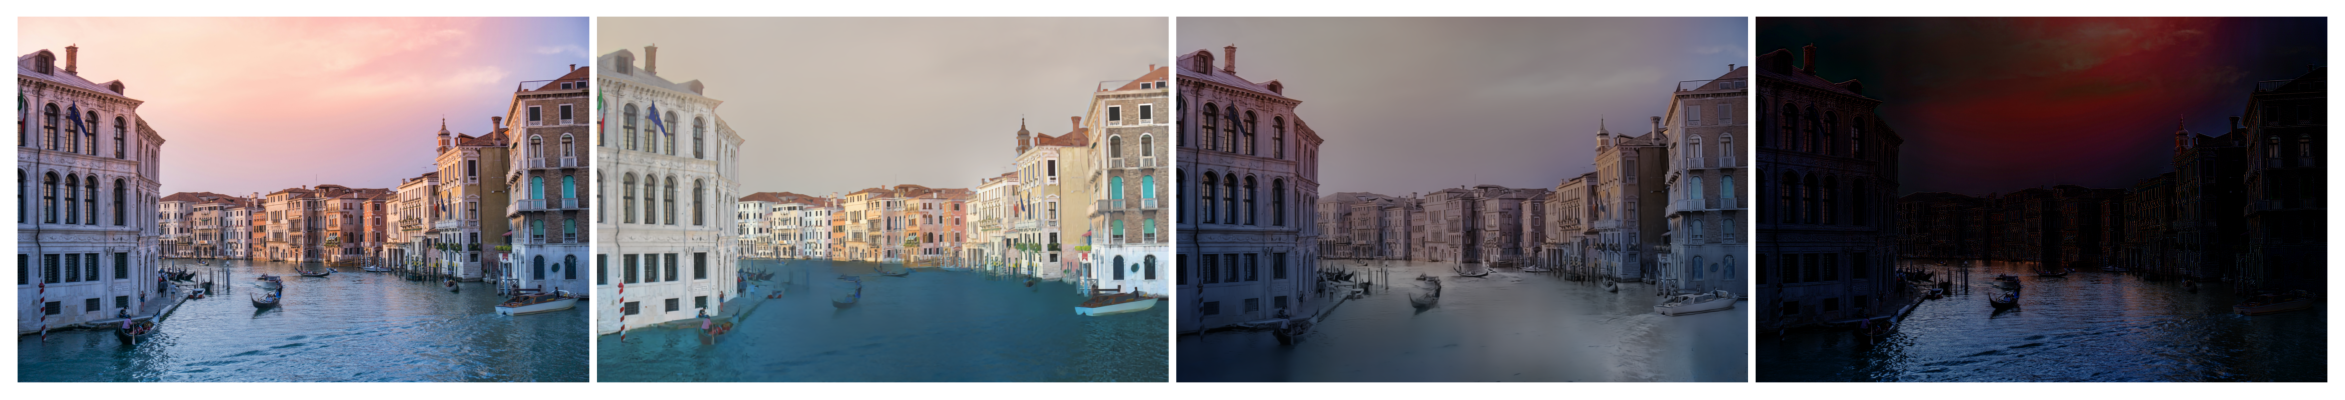

In [13]:
show([img, alb, dif, res], size=(30, 7))